In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('Fish.csv')

bream_df = df[df['Species'] == 'Bream']

bream_weight = bream_df['Weight'].tolist()
bream_length = bream_df['Length2'].tolist()

smelt_df = df[df['Species'] == 'Smelt']

smelt_weight = smelt_df['Weight'].tolist()
smelt_length = smelt_df['Length2'].tolist()

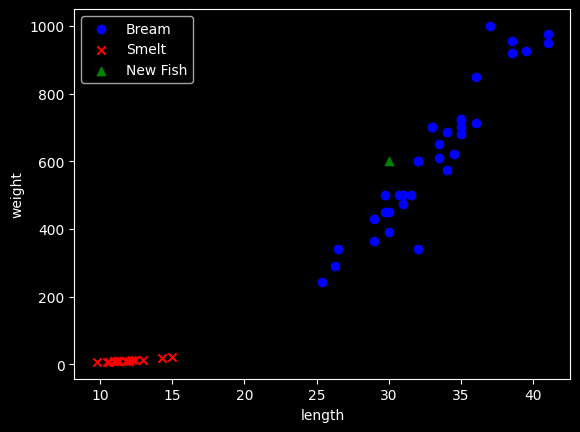

In [215]:
plt.scatter(bream_length, bream_weight, color='blue', marker='o', label='Bream')
plt.scatter(smelt_length, smelt_weight, color='red', marker='x', label='Smelt')
plt.scatter(30, 600, color='green', marker='^', label='New Fish')
plt.xlabel('length')
plt.ylabel('weight')

plt.legend()
plt.show()

In [216]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = np.column_stack((length, weight))

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [217]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

pre = kn.predict([[30,600]])
print(pre)

[1.]


In [218]:
k5_score = kn.score(fish_data, fish_target)

kn.n_neighbors = 49
k49_score = kn.score(fish_data, fish_target)
kn.n_neighbors = 5
print(k49_score)
print(k5_score)

0.7142857142857143
1.0


In [219]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

train_input, test_input, train_target, test_target = train_test_split(input_arr, target_arr, stratify=target_arr, random_state=17)

print(test_target)

[1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.]


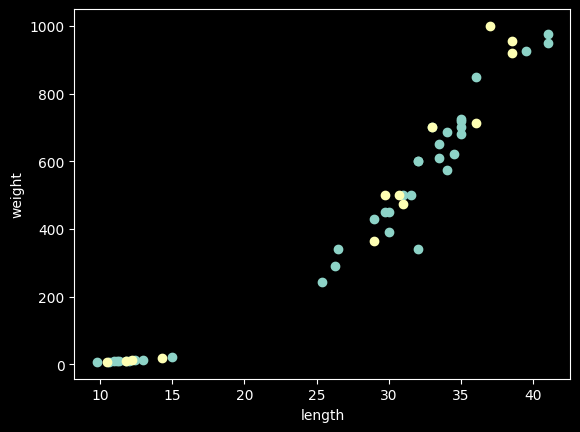

In [220]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [221]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [222]:
print(kn.predict([[25, 150]]))

[0.]


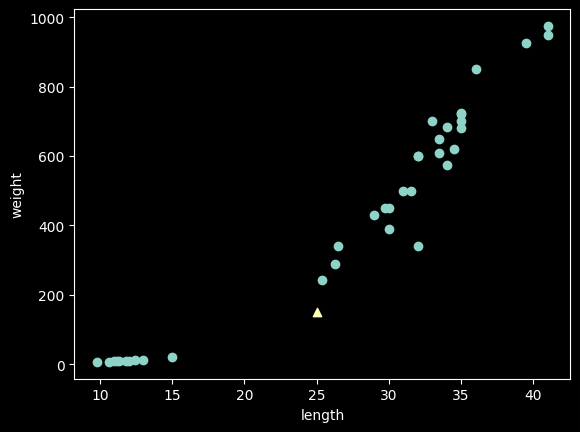

In [223]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

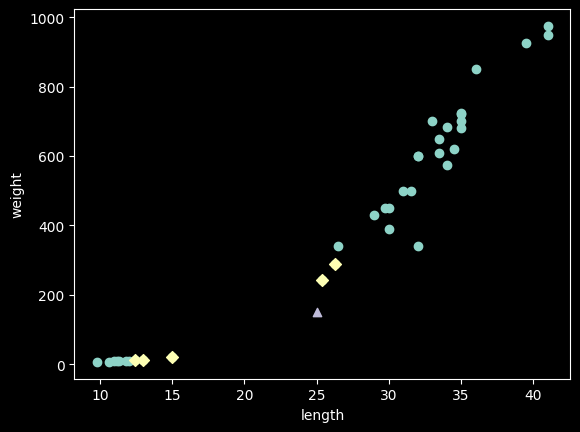

In [224]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

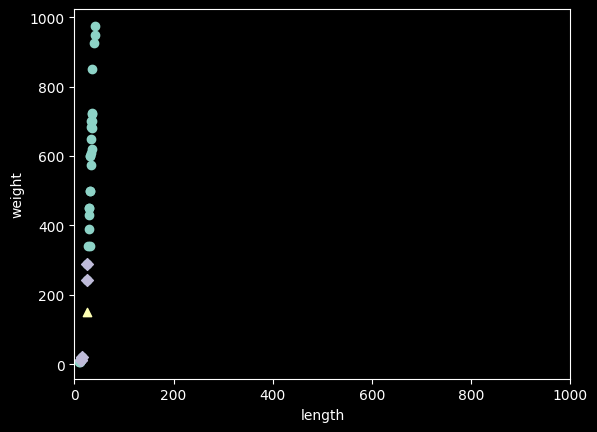

In [225]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [226]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean) / std

sample_scaled = (np.array([25, 150]) - mean) / std

kn.fit(train_scaled, train_target)
distances, indexes = kn.kneighbors([sample_scaled])

kn.predict([sample_scaled])

array([1.])

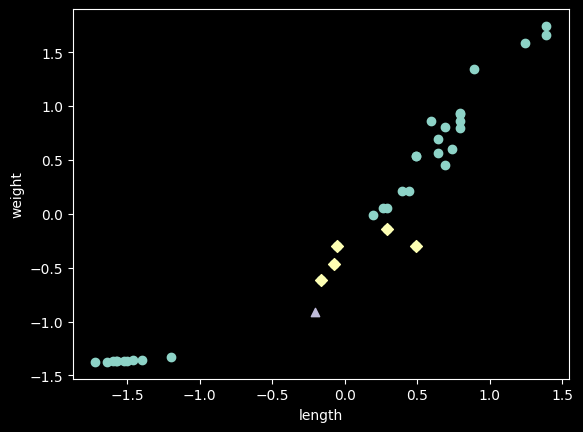

In [228]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.scatter(sample_scaled[0], sample_scaled[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [229]:
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0